# Final Project: Facial Keypoints Detection

https://www.kaggle.com/c/facial-keypoints-detection

https://www.kaggle.com/c/facial-keypoints-detection/data

In [3]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

from numpy import genfromtxt

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load data from current directory.

In [79]:
D = 96

# get headers

tmp = open("training.csv", "r")
keyPointNames = tmp.readline().split(",")[:-1]
tmp.close()

print keyPointNames
print len(keyPointNames)



#f = open("experiment.csv")

#experiment_target = np.genfromtxt((" ".join(ln.split(",")[len(keyPointNames):]) for ln in f), dtype=None, skip_header = 1)

#print experiment_target.shape
#experiment_img = np.genfromtxt((" ".join(ln.split(",")[-1:]) for ln in f), dtype=None, skip_header = 1)

#experiment = genfromtxt("experiment.csv", skip_header = 1, dtype=None, usecols=range(0,2))
#print experiment_target

['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y', 'left_eye_inner_corner_x', 'left_eye_inner_corner_y', 'left_eye_outer_corner_x', 'left_eye_outer_corner_y', 'right_eye_inner_corner_x', 'right_eye_inner_corner_y', 'right_eye_outer_corner_x', 'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y', 'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x', 'mouth_right_corner_y', 'mouth_center_top_lip_x', 'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y']
30
(4, 9216)
[[238 236 237 ...,  70  75  90]
 [219 215 204 ...,   1   1   1]
 [144 142 159 ...,  78  78  77]
 [193 192 193 ...,   1   1   1]]


In [89]:
# On my laptop, the following read takes a few minutes.

f = open("training.csv")
#f = open("experiment.csv")

# Use | to handle missing value between ,,
train_target = genfromtxt(("|".join(ln.split(",")[:-1]) for ln in f), dtype=None, skip_header = 1, delimiter="|")
f.seek(0)
train_img = genfromtxt(("|".join(ln.split(",")[len(keyPointNames):]) for ln in f), dtype=None, skip_header = 1)
f.close()

print train_target.shape
print train_img.shape

print train_img[0]
#print test.shape

(7049, 30)
(7049, 9216)
[238 236 237 ...,  70  75  90]


In [93]:
f = open("test.csv")

# Use | to handle missing value between ,,
test_img_id = genfromtxt(("|".join(ln.split(",")[:-1]) for ln in f), dtype=None, skip_header = 1, delimiter="|")
f.seek(0)
test_img = genfromtxt(("|".join(ln.split(",")[1:]) for ln in f), dtype=None, skip_header = 1)
f.close()

print test_target.shape
print test_img.shape

print test_img[0]

(1783,)
(1783, 9216)
[182 183 182 ...,   8   5   5]


In [97]:
print train_img.shape[0]
shuffle = np.random.permutation(np.arange(train_img.shape[0]))
train_target, train_img = train_target[shuffle], train_img[shuffle]

DIVIDE = 6000

train_data, train_labels = train_img[:DIVIDE], train_target[:DIVIDE]
dev_data, dev_labels = train_img[DIVIDE:], train_target[DIVIDE:]

print train_data.shape
print dev_data.shape

7049
(6000, 9216)
(1049, 9216)


[195 202 210 ...,  43  43  42]


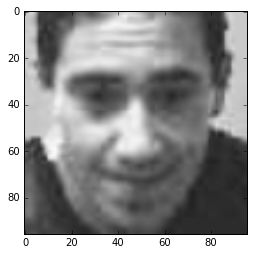

In [112]:
def showImg(src = train_data, id=0):
    print src[id]
    plt.imshow(src[id].reshape(D, D), cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
    
showImg(id=5)
    

[ 76  87  81 ..., 228 211 168]


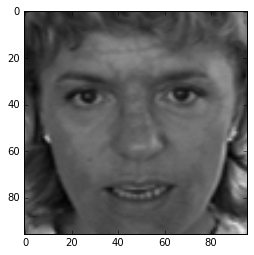

In [110]:
showImg(src=test_img, id = 1)

[13 17 20 ..., 32 30 28]


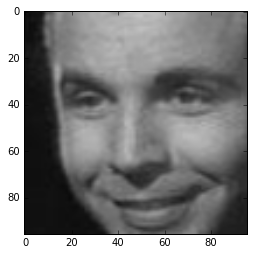

In [118]:
showImg(src=dev_data, id = 1040)